In [8]:
from unittest.mock import inplace

# from unittest.mock import inplace

import pandas as pd

df = pd.read_csv("daily_sales.csv")

if not all(col in df.columns for col in ["Date", "Sales"]):
    print("Missing required columns")

df["Date"] = pd.to_datetime(df["Date"])

df.set_index("Date", inplace=True)

print(df.head())
len(df)


            Sales
Date             
2023-01-01    739
2023-01-02    198
2023-01-03    564
2023-01-04    196
2023-01-05    522


90

In [9]:
new_df = df.rolling(7)
new_df

Rolling [window=7,center=False,axis=0,method=single]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fruit      6 non-null      object
 1   Color      6 non-null      object
 2   Weight     6 non-null      int64 
 3   Sweetness  6 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 324.0+ bytes


C:\Users\Ebrahim_sf\AppData\Local\Temp\ipykernel_16424\26813629.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


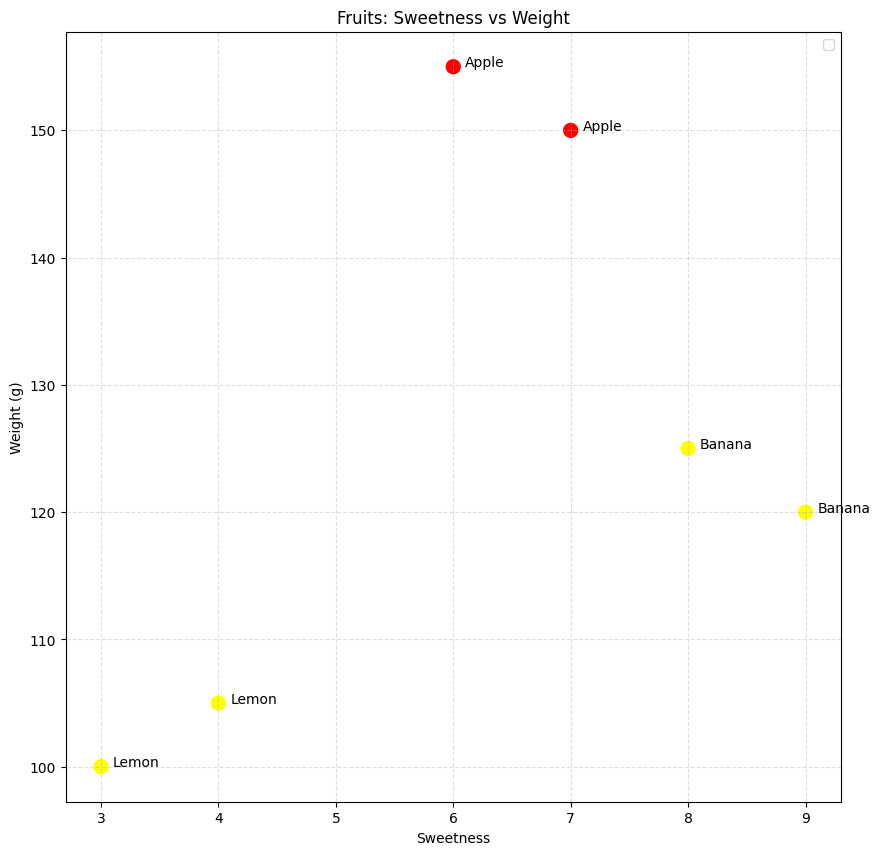

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data_original = [
    {"Fruit": "Apple", "Color": "Red", "Weight": "155g", "Sweetness": 6},
    {"Fruit": "Banana", "Color": "Yellow", "Weight": "125g", "Sweetness": 8},
    {"Fruit": "Lemon", "Color": "Yellow", "Weight": "105g", "Sweetness": 4},
]

new_original = [
    {"Fruit": "Apple", "Color": "Red", "Weight": "150g", "Sweetness": 7},
    {"Fruit": "Banana", "Color": "Yellow", "Weight": "120g", "Sweetness": 9},
    {"Fruit": "Lemon", "Color": "Yellow", "Weight": "100g", "Sweetness": 3},
]

df_original = pd.DataFrame(data_original)
new_original = pd.DataFrame(new_original)
df_original = pd.concat([df_original, new_original], ignore_index=True)
df_original["Weight"] = df_original["Weight"].str.replace("g", "", regex=False).astype(int)
df_original.info()
plt.figure(figsize=[10, 10])
plt.scatter(df_original["Sweetness"], df_original["Weight"], c=df_original["Color"], s=100)
for i in range(len(df_original)):
    plt.text(df_original["Sweetness"][i] + 0.1, df_original["Weight"][i], df_original["Fruit"][i])

plt.xlabel("Sweetness")
plt.ylabel("Weight (g)")
plt.title("Fruits: Sweetness vs Weight")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.show()
